In [1]:
from predoc.plots_composed import earliness_test, curves_test, interpretability, stability, distribution_auprc_med_days, heat_pareto, curves_ablation, curves_algos

from predoc.utils import load_data, load_model, save_data
from predoc.interpretability import interpret_strip_df, get_top10
from predoc.dictionaries_columns import translations_dict
from predoc.datasets import data_dir
from predoc.clean_raw_functions import filtered_txt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker


from predoc.model_performance import calc_area, calc_av_precision, corrected_std, compute_corrected_ttest, fdr, t_stat_various, get_predictions
    
from predoc.dictionaries_columns import translations_dict
import pandas as pd
from paretoset import paretoset
from matplotlib.transforms import Bbox
import numpy as np
from scipy.stats import weightedtau
import matplotlib.ticker as ticker
from matplotlib.artist import Artist
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
data_dir

'/home/igutierrez/projects/predoc/data'

/home/igutierrez/projects/predoc/predoc/plots_composed.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)


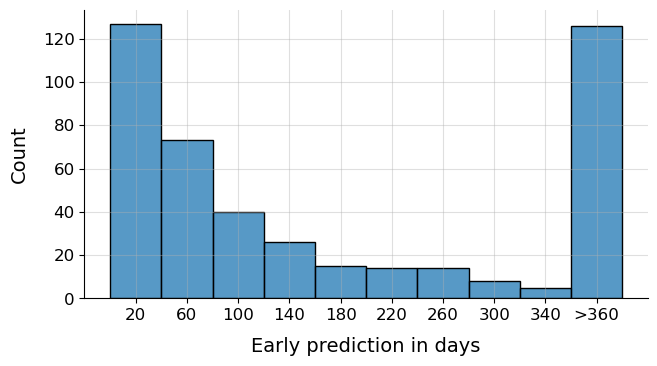

In [3]:
earliness_test(data_path=f"{data_dir}/omop/simulate/")

/home/igutierrez/projects/predoc/predoc/plots_composed.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


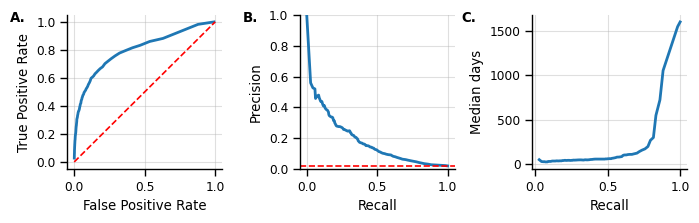

In [4]:
curves_test(data_path=f"{data_dir}/omop/validate/", curves_file="metrics_thresholds_test.parquet")

In [7]:
from predoc.plots_composed import get_feature_trajectories

tmp = get_feature_trajectories(
    f"{data_dir}/omop/simulate/",
    single="5278413491", # Put here and id to check a patient
    single_file=True,
    year_min=2018,
    year_max=2022,
    horizon=30,
    history=180,)

KeyError: 'dump_date'

In [ ]:
interpretability(train_data_path = f"{data_dir}/omop/train/ebm_30_180_seed1/",
                 simulate_data_path = f"{data_dir}/omop/simulate/",
                 model_name="EBM_180history-30horizon_.sav",
                 single="5278413491",
                 single_file=False)

KeyError: 'dump_date'

/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:601: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)


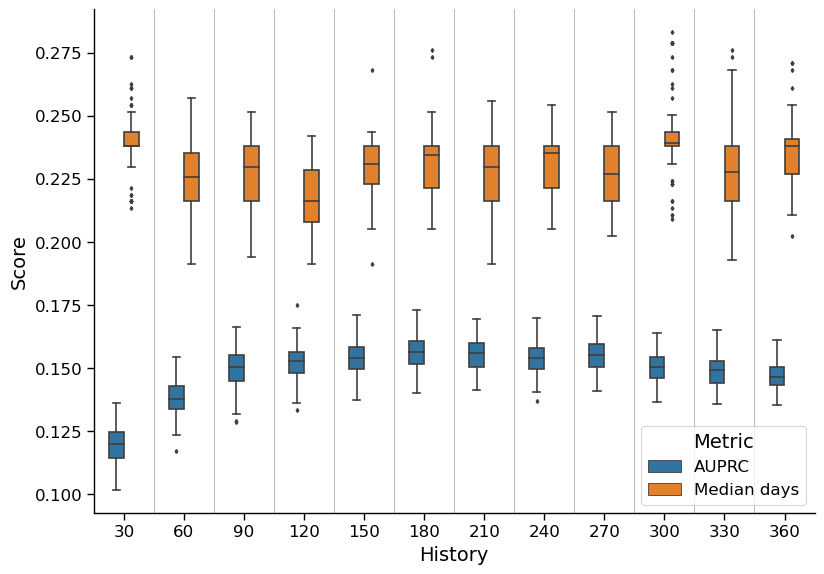

In [ ]:
distribution_auprc_med_days(
    data_path="sandbox/voliva",
    horizon=30,
    history=180,
    seeds=1,
    recall=0.58,
)

/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:451: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12, rotation=20)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:478: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:479: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12, rotation=20)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:497: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels=[f'{i:.3f}' for i in ax4.get_xticks()], 

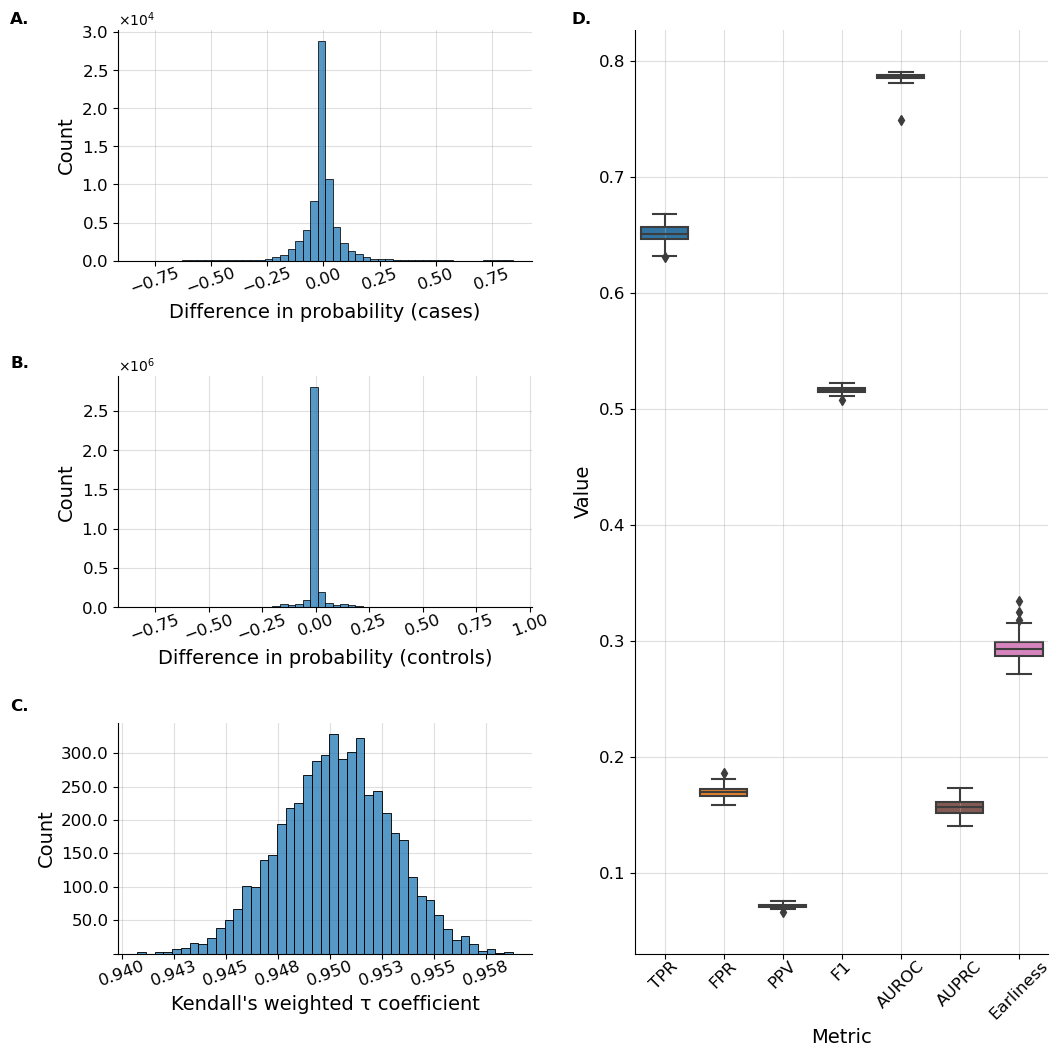

In [2]:
stability(data_path="sandbox/voliva", seed_file=True, metrics_file="metrics_aggregated_test.parquet", set_="test")

/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:645: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Precision gain":df["Precision gain"].max(), "Recall gain": 0}, ignore_index=True)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:645: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Precision gain":df["Precision gain"].max(), "Recall gain": 0}, ignore_index=True)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:645: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Precision gain":df["Precision gain"].max(), "Recall gain": 0}, ignore_index=True)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:645: FutureWarning: The frame.append method is deprecated and will be removed from pand

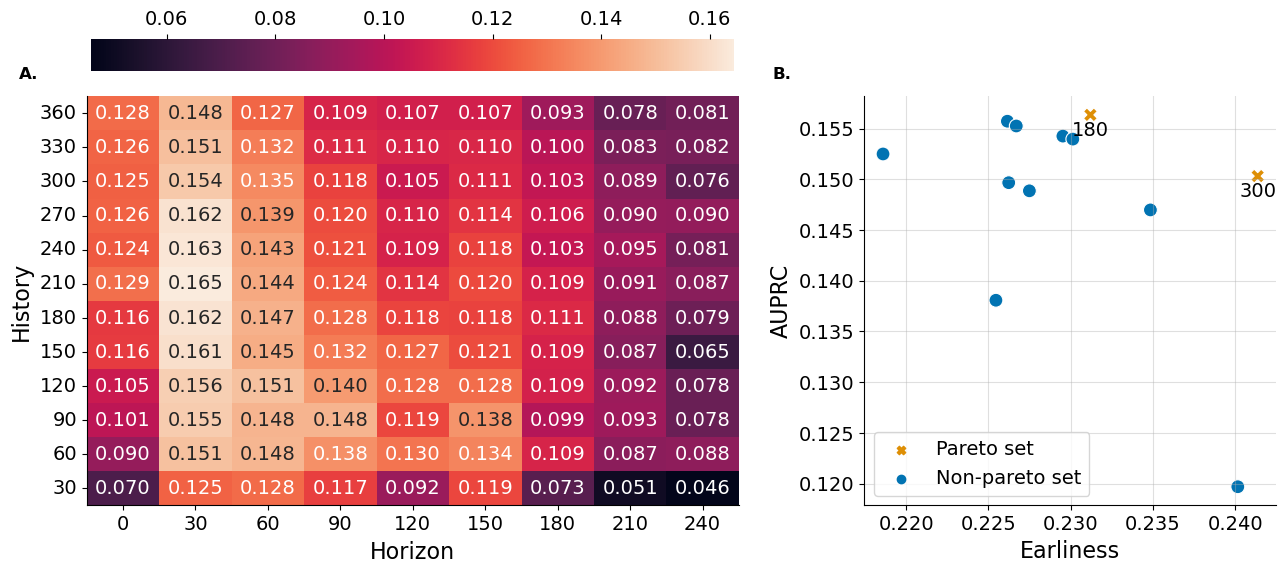

In [3]:
heat_pareto(data_path="sandbox/voliva")

/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:793: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=ax[i,j].get_xticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:794: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_yticklabels(labels=ax[i,j].get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:834: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_yticklabels(labels=[i for i in range(0, 1600, 200)], fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:837: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_yticklabels(labels=ax[1,1].get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:840: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(labels=ax[1,1].get_xticklabels

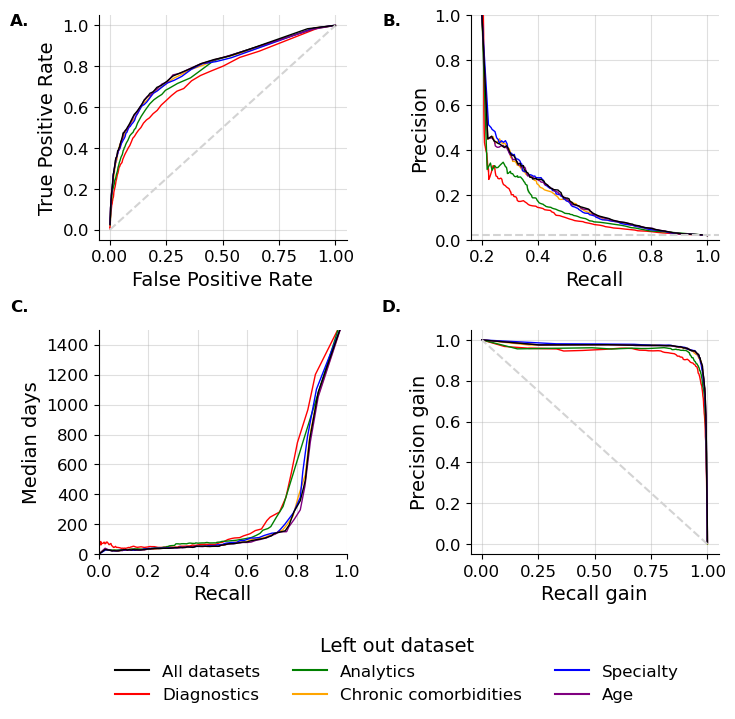

In [4]:
curves_ablation(data_path="sandbox/voliva")

gbc_seed3
ebm_seed3
algos together
plotting


/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:896: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(labels=ax[i,j].get_xticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_yticklabels(labels=ax[i,j].get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:931: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_yticklabels(labels=[i for i in range(0, 1600, 200)], fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:934: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_yticklabels(labels=ax[1,1].get_yticklabels(), fontsize=12)
/home/voliva/hgsoc_ml/hgsoc_ml/plots_composed.py:937: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(labels=ax[1,1].get_xticklabels

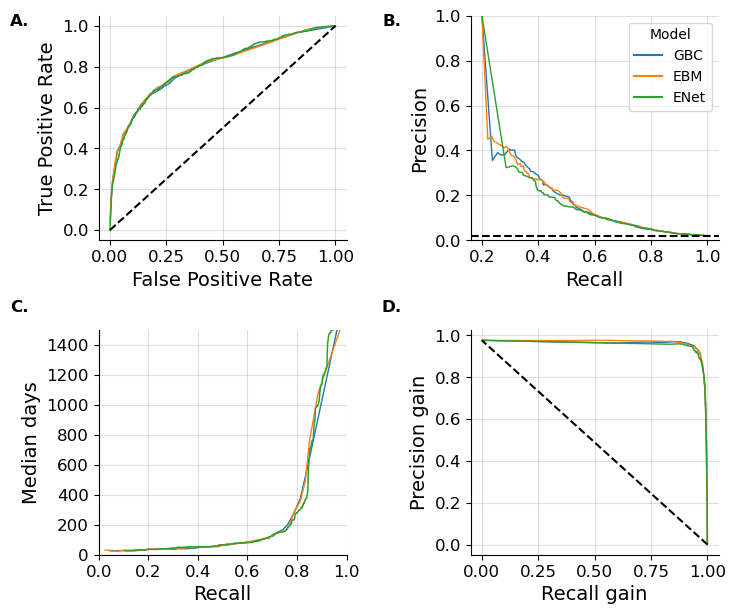

In [5]:
curves_algos(data_path="sandbox/voliva")